## import

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [26]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


## Data setting

In [27]:
df = pd.read_csv('/content/drive/MyDrive/mini/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [28]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- customerID : 소비자의 식별자
- gender : 성별
- SeniorCitizen : 노인인지의 여부
- Partner : 배우자의 유무
- Dependents : 자녀의 유무
- tenure : 고객의 가입 기간 (개월 수)
- PhoneService : 휴대폰 서비스를 가입 했는지의 여부
- MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
- InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
- OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
-DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- Contract : 계약 유형 (Month-to-month, One year, Two year)
- PaperlessBilling : 전자 고지서 여부
- PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : 매달 고객에게 청구되는 금액
- TotalCharges : 고객에게 청구된 총 금액
- Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].dtype)

11
float64


In [31]:
y = df['Churn']
X = df.drop(['Churn'], axis=1)

In [32]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=df['Churn'], random_state=42)

In [33]:
train = pd.concat([X_tr, y_tr], axis=1)

In [34]:
train.head() #eda data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
3810,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


## 분석

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 
 1

In [36]:
train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [37]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163294,32.485091,64.929961,2299.334682
std,0.369667,24.568744,30.138105,2279.204278
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.662500,402.975000
50%,0.000000,29.000000,70.500000,1394.925000
75%,0.000000,55.000000,90.000000,3835.825000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn'>

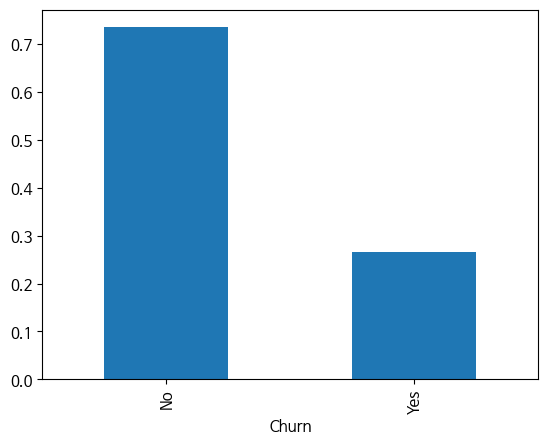

In [38]:
train['Churn'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

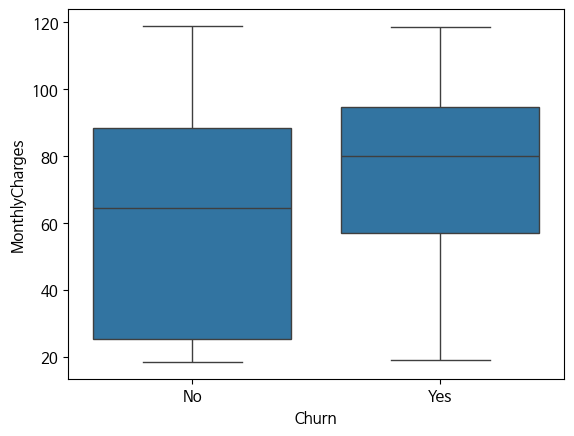

In [39]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=train)
# 이탈 고객들은 상대적으로 매달 고객에게 청구되는 금액이 높음

contract -> 월 계약 고객 이탈률 4배 높음

In [40]:
# 계약 유형별 비율 계산
contract_ratio = train['Contract'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
contract_ratio_percentage = contract_ratio * 100
print(contract_ratio_percentage)

Contract
Month-to-month    55.058573
Two year          24.121406
One year          20.820021
Name: proportion, dtype: float64


In [41]:
# 계약 유형별 이탈 고객 비율 계산
contract_churn_ratio = train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(contract_churn_ratio)

Churn                 No       Yes
Contract                          
Month-to-month  0.572534  0.427466
One year        0.889173  0.110827
Two year        0.971302  0.028698


<Axes: xlabel='Contract', ylabel='count'>

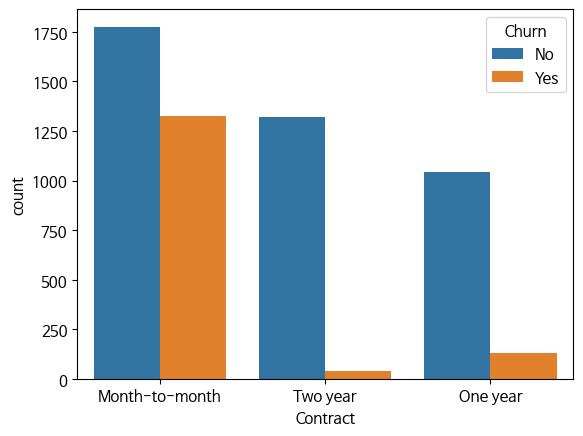

In [42]:
sns.countplot(x='Contract', hue='Churn', data=train)
# 이탈 고객은 월 계약이 압도적으로 높음

PaperlessBilling - 전자 고지서 받는 게 이탈률 더 높음

In [43]:
# 계약 유형별 비율 계산
PaperlessBilling_ratio = train['PaperlessBilling'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
PaperlessBilling_ratio_percentage = PaperlessBilling_ratio * 100
print(PaperlessBilling_ratio_percentage)

PaperlessBilling
Yes    59.123181
No     40.876819
Name: proportion, dtype: float64


In [44]:
# 전자고지서 유무별 이탈 고객 비율 계산
PaperlessBilling_churn_ratio = train.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(PaperlessBilling_churn_ratio)

Churn                   No       Yes
PaperlessBilling                    
No                0.839774  0.160226
Yes               0.661963  0.338037


<Axes: xlabel='PaperlessBilling', ylabel='count'>

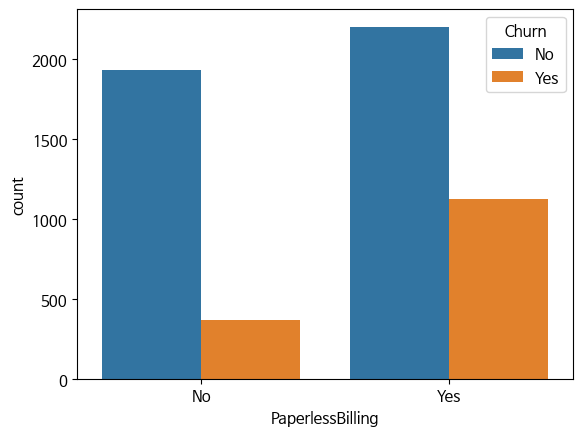

In [45]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=train)
# 이탈 고객은 전자고지서를 많이 받는다

PaymentMethod -> Electronic check가 다른 납부방법보다 3배이상 이탈률 높음

In [46]:
# 납부방법 유형별 비율 계산
PaymentMethod_ratio = train['PaymentMethod'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
PaymentMethod_ratio_percentage = PaymentMethod_ratio * 100
print(PaymentMethod_ratio_percentage)

PaymentMethod
Electronic check             33.564075
Mailed check                 22.825701
Bank transfer (automatic)    22.080227
Credit card (automatic)      21.529996
Name: proportion, dtype: float64


In [47]:
# 납부방법별 이탈 고객 비율 계산
PaymentMethod_churn_ratio = train.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(PaymentMethod_churn_ratio)

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.838424  0.161576
Credit card (automatic)    0.850783  0.149217
Electronic check           0.542570  0.457430
Mailed check               0.807154  0.192846


InternetService -> Fiber optic 이 DSL 보다 이탈률 2배 이상



In [48]:
# 인터넷 유형별 비율 계산
InternetService_ratio = train['InternetService'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
InternetService_ratio_percentage = InternetService_ratio * 100
print(InternetService_ratio_percentage)

InternetService
Fiber optic    44.071707
DSL            34.380547
No             21.547746
Name: proportion, dtype: float64


In [49]:
in_churn_table = pd.crosstab(train['InternetService'], train['Churn'], margins=True, margins_name="Total")
in_churn_table
# DSL보다 Fiber optic 사용할 경우 이탈률이 높음

Churn,No,Yes,Total
InternetService,,,
DSL,1575,362,1937
Fiber optic,1438,1045,2483
No,1126,88,1214
Total,4139,1495,5634


In [50]:
# 인터넷별 이탈 고객 비율 계산
InternetService_churn_ratio = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(InternetService_churn_ratio)

Churn                  No       Yes
InternetService                    
DSL              0.813113  0.186887
Fiber optic      0.579138  0.420862
No               0.927512  0.072488


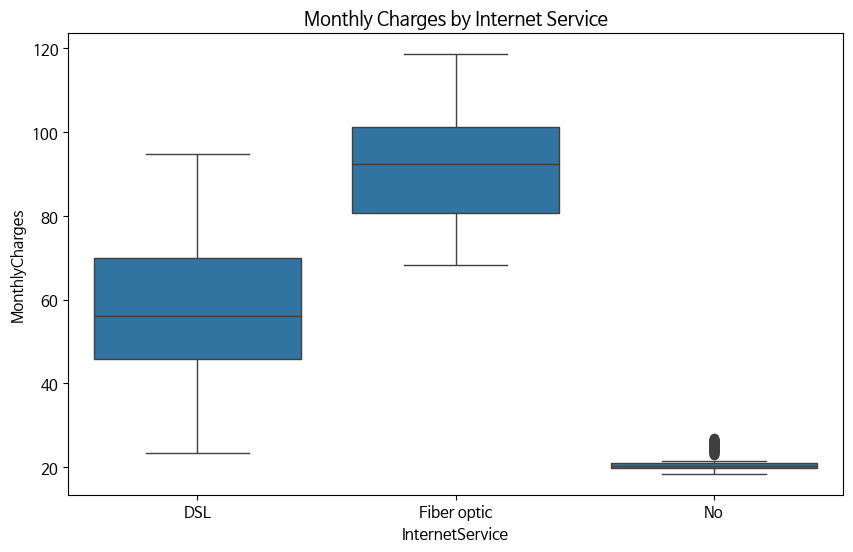

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=train)
plt.title('Monthly Charges by Internet Service')
plt.show()

## 부가서비스

OnlineSecurity -> 가입 안 한 사람 이탈률 높음

In [52]:
# 온라인보안 유형별 비율 계산
OnlineSecurity_ratio = train['OnlineSecurity'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
OnlineSecurity_ratio_percentage = OnlineSecurity_ratio * 100
print(OnlineSecurity_ratio_percentage)

OnlineSecurity
No                     49.645012
Yes                    28.807242
No internet service    21.547746
Name: proportion, dtype: float64


In [53]:
# 온라인보안별 이탈 고객 비율 계산
OnlineSecurity_churn_ratio = train.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(OnlineSecurity_churn_ratio)

Churn                      No       Yes
OnlineSecurity                         
No                   0.580622  0.419378
No internet service  0.927512  0.072488
Yes                  0.855823  0.144177


OnlineBackup -> 가입 안 한 사람 이탈률 높음

In [54]:
# 온라인백업 유형별 비율 계산
OnlineBackup_ratio = train['OnlineBackup'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
OnlineBackup_ratio_percentage = OnlineBackup_ratio * 100
print(OnlineBackup_ratio_percentage)

OnlineBackup
No                     43.343983
Yes                    35.108271
No internet service    21.547746
Name: proportion, dtype: float64


In [55]:
# 온라인백업별 이탈 고객 비율 계산
OnlineBackup_churn_ratio = train.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(OnlineBackup_churn_ratio)

Churn                      No       Yes
OnlineBackup                           
No                   0.598690  0.401310
No internet service  0.927512  0.072488
Yes                  0.784125  0.215875


DeviceProtection -> 인원수랑 비례해서 상관없는 듯

In [56]:
# 디바이스프로텍샨 유형별 비율 계산
DeviceProtection_ratio = train['DeviceProtection'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
DeviceProtection_ratio_percentage = DeviceProtection_ratio * 100
print(DeviceProtection_ratio_percentage)

DeviceProtection
No                     43.876464
Yes                    34.575790
No internet service    21.547746
Name: proportion, dtype: float64


In [57]:
# 디바이스프로텍션별 이탈 고객 비율 계산
DeviceProtection_churn_ratio = train.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(DeviceProtection_churn_ratio)

Churn                      No       Yes
DeviceProtection                       
No                   0.610437  0.389563
No internet service  0.927512  0.072488
Yes                  0.772074  0.227926


TechSupport -> No count가 많지만 그에 비해 이탈률이 높음

In [58]:
#TechSupport유형별 비율 계산
TechSupport_ratio = train['TechSupport'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
TechSupport_ratio_percentage = TechSupport_ratio * 100
print(TechSupport_ratio_percentage)

# 디바이스프로텍션별 이탈 고객 비율 계산
TechSupport_churn_ratio = train.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(TechSupport_churn_ratio)

TechSupport
No                     49.183529
Yes                    29.268726
No internet service    21.547746
Name: proportion, dtype: float64
Churn                      No       Yes
TechSupport                            
No                   0.582461  0.417539
No internet service  0.927512  0.072488
Yes                  0.848393  0.151607


StreamingTV -> 유의미한 결과 x

In [59]:
#StreamingTV유형별 비율 계산
StreamingTV_ratio = train['StreamingTV'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
StreamingTV_ratio_percentage = StreamingTV_ratio * 100
print(StreamingTV_ratio_percentage)

# 디바이스프로텍션별 이탈 고객 비율 계산
StreamingTV_churn_ratio = train.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(StreamingTV_churn_ratio)

StreamingTV
No                     39.510117
Yes                    38.942137
No internet service    21.547746
Name: proportion, dtype: float64
Churn                      No       Yes
StreamingTV                            
No                   0.668913  0.331087
No internet service  0.927512  0.072488
Yes                  0.694622  0.305378


StreamingMovies -> 유의미한 결과 x

In [60]:
#StreamingMovies유형별 비율 계산
StreamingMovies_ratio = train['StreamingMovies'].value_counts(normalize=True)

# 비율을 백분율로 변환 후 출력
StreamingMovies_ratio_percentage = StreamingMovies_ratio * 100
print(StreamingMovies_ratio_percentage)

# StreamingMovies 이탈 고객 비율 계산
StreamingMovies_churn_ratio = train.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack()

# 비율 출력
print(StreamingMovies_churn_ratio)

StreamingMovies
No                     39.350373
Yes                    39.101881
No internet service    21.547746
Name: proportion, dtype: float64
Churn                      No       Yes
StreamingMovies                        
No                   0.663960  0.336040
No internet service  0.927512  0.072488
Yes                  0.699501  0.300499


In [61]:
# 가격 설정 기준

def print_statistics(service_column, title):
    stats = train.groupby(service_column)['MonthlyCharges'].describe()
    print(f"통계값 ({title}):\n", stats)
    print("\n" + "-"*50 + "\n")

columns = ['OnlineSecurity', 'InternetService', 'TechSupport', 'PaymentMethod']
titles = ['OnlineSecurity', 'InternetService', 'TechSupport', 'PaymentMethod']

for col, title in zip(columns, titles):
    print_statistics(col, title)

통계값 (OnlineSecurity):
                       count       mean        std    min    25%    50%  \
OnlineSecurity                                                           
No                   2797.0  75.891759  21.886910  23.45  59.45  79.55   
No internet service  1214.0  21.114786   2.195092  18.40  19.70  20.15   
Yes                  1623.0  78.812569  22.093935  29.05  60.50  79.85   

                        75%     max  
OnlineSecurity                       
No                   94.100  113.60  
No internet service  20.950   26.90  
Yes                  96.375  118.75  

--------------------------------------------------

통계값 (InternetService):
                   count       mean        std    min    25%    50%     75%  \
InternetService                                                              
DSL              1937.0  58.116004  16.371394  23.45  45.90  56.15   70.05   
Fiber optic      2483.0  91.667882  12.632461  68.25  80.65  92.45  101.35   
No               1214.0  21

## encoding , feature engineering

In [65]:
services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train[services_columns] = train[services_columns].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
X_te[services_columns] = X_te[services_columns].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

train['AdditionalServicesCount'] = train[services_columns].sum(axis=1)
X_te['AdditionalServicesCount'] = X_te[services_columns].sum(axis=1)

X_te[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'AdditionalServicesCount']].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,AdditionalServicesCount
437,1,1,1,1,1,1,6
2280,0,0,0,1,1,1,3
2235,1,1,1,0,1,0,4
4460,0,0,1,1,0,0,2
3761,1,1,1,0,1,1,5


서비스 가입에 많이 할수록 이탈률이 줄어듬

In [66]:
AdditionalServicesCount_ratio = train['AdditionalServicesCount'].value_counts(normalize=True)

AdditionalServicesCount_ratio_percentage = AdditionalServicesCount_ratio * 100
print(AdditionalServicesCount_ratio_percentage)

AdditionalServicesCount_churn_ratio = train.groupby('AdditionalServicesCount')['Churn'].value_counts(normalize=True).unstack()

print(AdditionalServicesCount_churn_ratio)

AdditionalServicesCount
0    31.185659
3    15.708200
2    14.767483
1    13.596024
4    12.335818
5     8.235712
6     4.171104
Name: proportion, dtype: float64
Churn                          No       Yes
AdditionalServicesCount                    
0                        0.790552  0.209448
1                        0.541775  0.458225
2                        0.638221  0.361779
3                        0.722034  0.277966
4                        0.769784  0.230216
5                        0.875000  0.125000
6                        0.953191  0.046809


In [67]:
train['Partner'] = train['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
train['Dependents'] = train['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

X_te['Partner'] = X_te['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
X_te['Dependents'] = X_te['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

In [68]:
train['MultipleLines'] = train['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
train['InternetService'] = train['InternetService'].replace({'Fiber optic': 2, 'No': 0, 'DSL': 1})
train['Contract'] = train['Contract'].replace({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
train['PaymentMethod'] = train['PaymentMethod'].replace({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0})

X_te['MultipleLines'] = X_te['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
X_te['InternetService'] = X_te['InternetService'].replace({'Fiber optic': 2, 'No': 0, 'DSL': 1})
X_te['Contract'] = X_te['Contract'].replace({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
X_te['PaymentMethod'] = X_te['PaymentMethod'].replace({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0})

In [69]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'PhoneService',
                     'PaperlessBilling']

for column in columns_to_encode:
    train[column] = label_encoder.fit_transform(train[column])

for column in columns_to_encode:
    X_te[column] = label_encoder.fit_transform(X_te[column])

train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalServicesCount
3738,4950-BDEUX,1,0,0,0,35,0,0,1,0,...,0,1,1,1,0,3,49.20,1701.65,No,3
3151,7993-NQLJE,1,0,1,1,15,1,0,2,1,...,0,0,0,1,0,2,75.10,1151.55,No,1
4860,7321-ZNSLA,1,0,1,1,13,0,0,1,1,...,1,0,0,24,0,2,40.55,590.35,No,3
3867,4922-CVPDX,0,0,1,0,26,1,0,1,0,...,0,1,1,24,1,0,73.50,1905.70,No,4
3810,2903-YYTBW,1,0,1,1,1,1,0,1,0,...,0,0,0,1,0,3,44.55,44.55,No,0


In [70]:
# Churn 컬럼의 Yes를 1, No를 0으로 변환
y_te = pd.DataFrame(y_te)
train['Churn'] = train['Churn'].replace({'Yes': 1, 'No': 0})
y_te['Churn'] = y_te['Churn'].replace({'Yes': 1, 'No': 0})

print(train[['Churn']].head())
print(y_te[['Churn']].head())

      Churn
3738      0
3151      0
4860      0
3867      0
3810      0
      Churn
437       0
2280      0
2235      0
4460      0
3761      0


## 통계

In [71]:
grid = ['InternetService', 'OnlineBackup','OnlineSecurity', 'TechSupport' ,'PaymentMethod','PaperlessBilling']

In [72]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 2. 피처(독립 변수)와 타겟 변수 설정
X = train['InternetService']
y = train['Churn']

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. 이분형 로지스틱 회귀 모델 학습
model = sm.Logit(y, X)
result = model.fit()

# 5. 결과 요약 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521588
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5632
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.09851
Time:                        11:08:00   Log-Likelihood:                -2938.6
converged:                       True   LL-Null:                       -3259.7
Covariance Type:            nonrobust   LLR p-value:                1.107e-141
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.5817      0.083    -31.155      0.000      -2.744      -2.419
InternetServic

In [73]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 2. 피처(독립 변수)와 타겟 변수 설정
X = train[grid]
y = train['Churn']

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. 이분형 로지스틱 회귀 모델 학습
model = sm.Logit(y, X)
result = model.fit()

# 5. 결과 요약 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.462659
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5627
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.2004
Time:                        11:08:00   Log-Likelihood:                -2606.6
converged:                       True   LL-Null:                       -3259.7
Covariance Type:            nonrobust   LLR p-value:                4.884e-279
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8931      0.103    -28.088      0.000      -3.095      -2.691
InternetSer